Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

In [3]:
%matplotlib inline
import pandas as pd
liver = pd.read_csv('/data/indian_liver_patient.csv')

In [2]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Description

This is a data set about people from India who were in a liver disease project.  There are several pieces of information about the individuals as well as a flag in the last column called `Dataset`.  In this column a `2` means the individual did **not** have liver disease.  A `1` indicates that the individual **did** have liver disease.

We wan to run some basic statistics on the Age, Gender, and Total Bilirubin BY if they had liver disease or not

The first step is to group by the Dataset column


In [3]:
liver = liver.groupby('Dataset')

In [5]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,2
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2


Then we can calculate som metrics on a few columns...

In [6]:
liver["Age"].mean()

Dataset
1    46.153846
2    41.239521
Name: Age, dtype: float64

In [7]:
liver["Age"].agg(['min','max','mean','median','std'])

,min,max,mean,median,std
Dataset,,,,,
1,7,90,46.153846,46,15.654412
2,4,85,41.239521,40,16.999366


Dataset
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

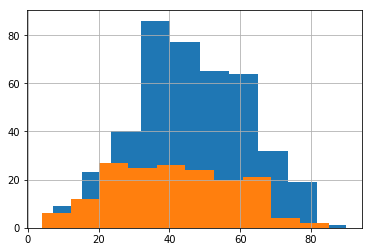

In [8]:
liver["Age"].hist()

Let's look at Bilirubin measure, too...

In [9]:
liver["Total_Bilirubin"].agg(['min','max','mean','std'])

,min,max,mean,std
Dataset,,,,
1,0.4,75.0,4.164423,7.144831
2,0.5,7.3,1.142515,1.004472


In [ ]:
liver.agg({'Total_Bilirubin': ['min','max','mean','std'], 'Direct_Bilirubin': ['mean','std']})

In [ ]:
liver["Total_Bilirubin"].hist()

# Custom Aggregation Function

It can also be handy to be able to create custom aggregation functions.  For our example, we're going to create a `percent_male` function that returns the percent of items in each group that are male.

In [10]:
def percent_male(series):
    total = len(series)
    male = sum(series == 'Male')
    return male/total

In [11]:
liver.agg({'Gender': percent_male})

,Gender
Dataset,
1,0.778846
2,0.700599


## Custom Aggregation with `apply`

In [12]:
def percent_val(df, column='Gender', value='Male'):
    # Compute the percent of rows where *column* is *value*
    total = len(df)
    part = sum(df[column].astype(str) == str(value))
    #part = sum(df['Gender'] == 'Male')
    
    # Return this is a single valued Series
    return pd.Series([part/total], index=[str(value)+'%'])

In [13]:
liver.apply(percent_val)

,Male%
Dataset,
1,0.778846
2,0.700599


In [ ]:
liver.apply(percent_val, column='Gender', value='Female')

In [ ]:
liver.apply(percent_val, column='Age', value=62)

In [4]:
def percent_range(df, column='Age', min_value=-1, max_value=999):
    # Compute the percent of rows where *column* is *value*
    total = len(df)
    part = sum((df[column].astype(float) >= float(min_value)) & (df[column].astype(float) <= float(max_value)))
    
    # Return this is a single valued Series
    return pd.Series([part, part/total], 
                     index=[str(min_value)+' to '+str(max_value),str(min_value)+' to '+str(max_value)+'%'])

In [5]:
liver.apply(percent_range, column='Age', min_value=0, max_value=18)

KeyError: ('Age', 'occurred at index Age')